# Workers in Technology Companies

### In this notebook since our data is categorical, I decided to go deeper and look at each question seperatly using bar charts. 
### The purpose of this is to thorougly map out the data visually to see what stands out and what I would like to work on in the future.

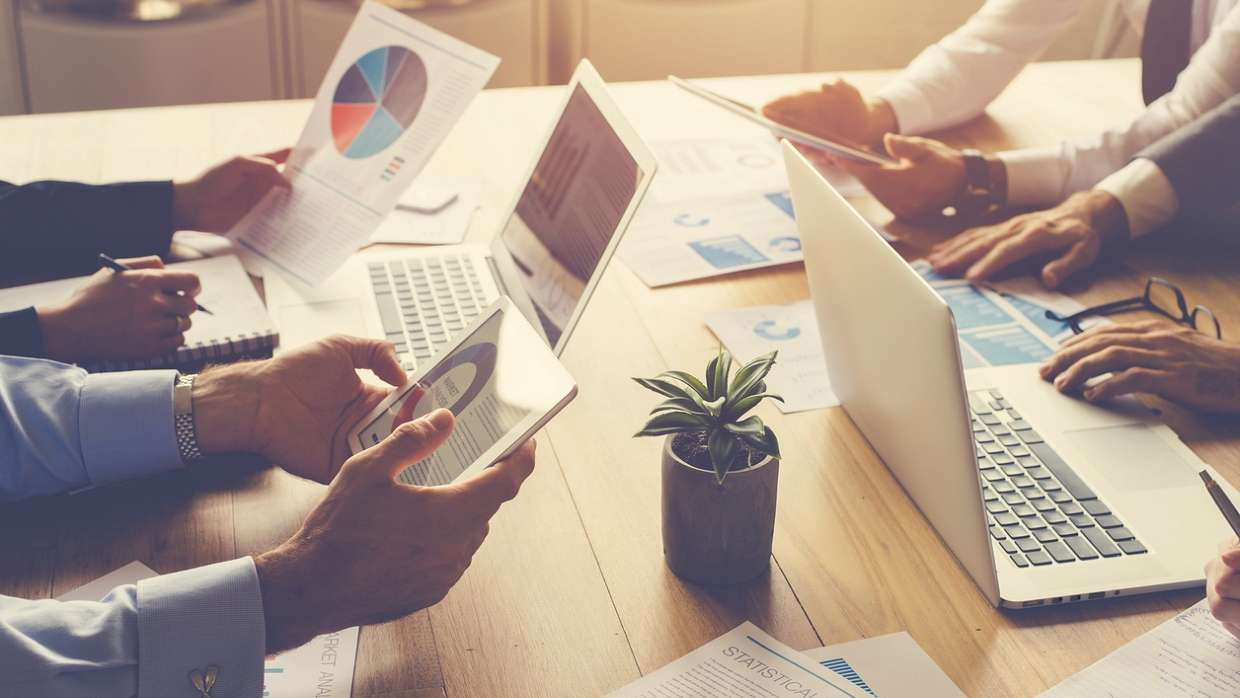

In [1]:
from IPython.display import Image
Image(filename="Images/mobility.jpg", width=600, height=1000)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
file = pd.read_csv("DATA/NRemoteWork.csv")
RWN = pd.DataFrame(file)

In [4]:
print("----- SHAPE -----")
print(RWN.shape)
print("----- DTYPES -----")
print(RWN.dtypes)
print("----- NAN -----")
print(RWN.isnull().sum(axis=0))

----- SHAPE -----
(883, 25)
----- DTYPES -----
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
age_range                    object
dtype: object
----- NAN -----
Age                    

In [5]:
# Replacing nan in state to NS = Not US State
RWN['state'] = RWN['state'].replace(np.nan, "NS")

In [6]:
RWN.drop(['age_range'], axis=1).head()

,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,No,No,Yes,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,No,No,No,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NS,Yes,No,No,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NS,No,Yes,Yes,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,33,Male,United States,TN,Yes,Yes,No,25-Jun,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No


In [7]:
# There should no Nan's but checking just in case. 
print("----- NAN -----")
print(RWN.isnull().sum(axis=0))

----- NAN -----
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64


## Diving Deeper into the Data

### Age discription and distribution of remote worker


count    883.000000
mean      31.380521
std        6.843915
min       18.000000
25%       26.000000
50%       30.000000
75%       35.000000
max       62.000000
Name: Age, dtype: float64


/Users/David/miniconda3/envs/MrLapin/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


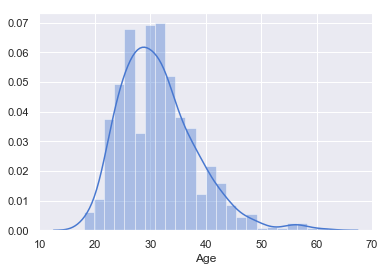

In [8]:
# Plot a histogram of the respondents' ages

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(RWN["Age"].dropna());

print("")
print(RWN["Age"].describe())

### - Gender

Male      78.482446
Female    19.818800
Trans      1.698754
Name: Gender, dtype: float64


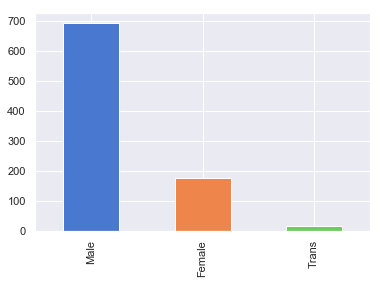

In [10]:
print(RWN["Gender"].value_counts(normalize=True) * 100)
RWN['Gender'].value_counts().plot(kind='bar')

### Countries

In [11]:
RWN['Country'].value_counts()

United States     513
United Kingdom    144
Canada             50
Germany            29
Ireland            22
Netherlands        19
Australia          13
France             10
India               9
Switzerland         7
Italy               7
Sweden              7
Belgium             6
Brazil              5
New Zealand         5
Israel              5
South Africa        3
Poland              3
Russia              2
Portugal            2
Finland             2
Colombia            2
Denmark             2
Singapore           2
Thailand            1
Slovenia            1
Georgia             1
Nigeria             1
Philippines         1
Bulgaria            1
Czech Republic      1
Mexico              1
Moldova             1
Latvia              1
Norway              1
Zimbabwe            1
Spain               1
Austria             1
Name: Country, dtype: int64

### Survey Questions

### I. Are you self employed?

No     94.563986
Yes     5.436014
Name: self_employed, dtype: float64



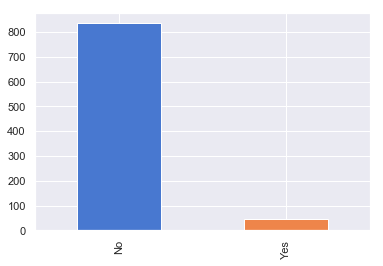

In [12]:
print(RWN["self_employed"].value_counts(normalize=True) * 100) 
print("")
RWN['self_employed'].value_counts().plot(kind='bar')

### II. Do you have a family history of mental illness?

No     61.381653
Yes    38.618347
Name: family_history, dtype: float64



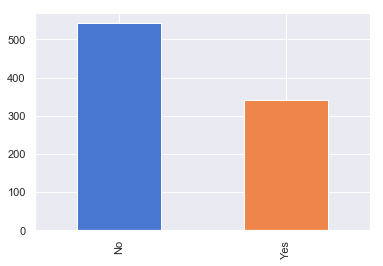

In [13]:
print(RWN["family_history"].value_counts(normalize=True) * 100)
print("")
RWN['family_history'].value_counts().plot(kind='bar')

### III. Have you sought treatment for a mental health condition?

No     50.283126
Yes    49.716874
Name: treatment, dtype: float64



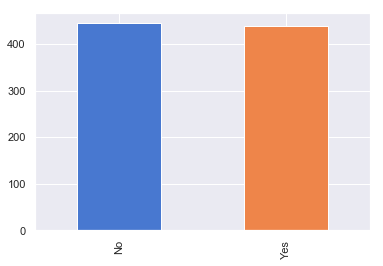

In [14]:
print(RWN["treatment"].value_counts(normalize=True) * 100)
print("")
RWN['treatment'].value_counts().plot(kind='bar')

### IV. How many employees does your company or organization have?

More than 1000    26.953567
26-100            23.556059
25-Jun            22.763307
100-500           14.835787
5-Jan              7.021518
500-1000           4.869762
Name: no_employees, dtype: float64



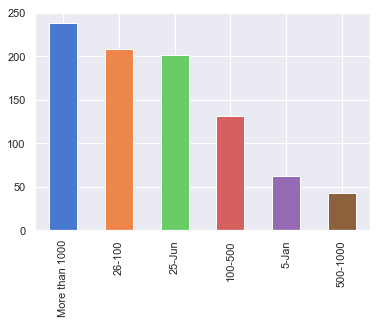

In [15]:
print(RWN["no_employees"].value_counts(normalize=True) * 100)
print("")
RWN['no_employees'].value_counts().plot(kind='bar')

### V. Does your employer provide mental health benefits?

Yes           40.770102
Don't know    31.936580
No            27.293318
Name: benefits, dtype: float64



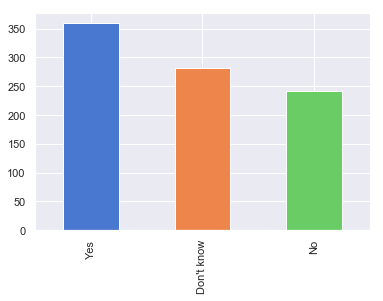

In [16]:
print(RWN["benefits"].value_counts(normalize=True) * 100)
print("")
RWN['benefits'].value_counts().plot(kind='bar')

### VI. Do you know the options for mental health care your employer provides?

No          39.637599
Yes         34.541336
Not sure    25.821065
Name: care_options, dtype: float64



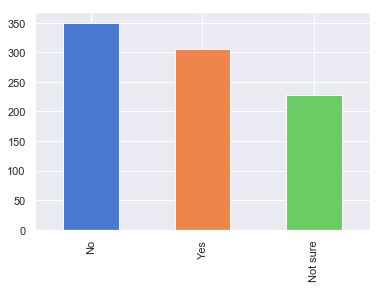

In [17]:
print(RWN["care_options"].value_counts(normalize=True) * 100)
print("")
RWN['care_options'].value_counts().plot(kind='bar')

### VII. Has your employer ever discussed mental health as part of an employee wellness program?

No            66.364666
Yes           19.818800
Don't know    13.816535
Name: wellness_program, dtype: float64



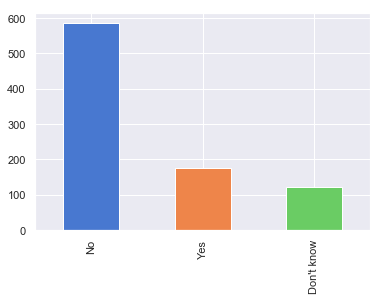

In [18]:
print(RWN["wellness_program"].value_counts(normalize=True) * 100)
print("")
RWN['wellness_program'].value_counts().plot(kind='bar')

### VIII. Does your employer provide resources to learn more about mental health issues and how to seek help?

No            50.396376
Don't know    28.539071
Yes           21.064553
Name: seek_help, dtype: float64



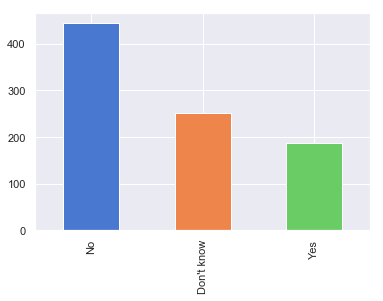

In [19]:
print(RWN["seek_help"].value_counts(normalize=True) * 100)
print("")
RWN['seek_help'].value_counts().plot(kind='bar')

### IX. Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

Don't know    64.892412
Yes           29.784824
No             5.322763
Name: anonymity, dtype: float64



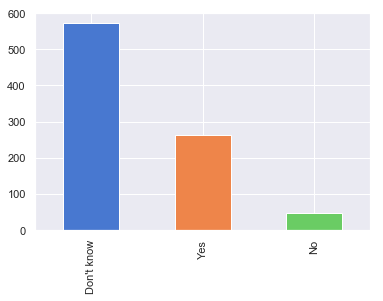

In [20]:
print(RWN["anonymity"].value_counts(normalize=True) * 100)
print("")
RWN['anonymity'].value_counts().plot(kind='bar')

### X. How easy is it for you to take medical leave for a mental health condition?

Don't know            47.112118
Somewhat easy         21.630804
Very easy             14.382786
Somewhat difficult    10.079275
Very difficult         6.795017
Name: leave, dtype: float64



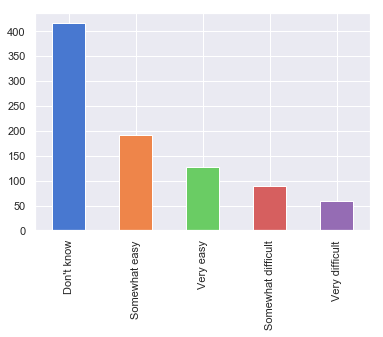

In [21]:
print(RWN["leave"].value_counts(normalize=True) * 100)
print("")
RWN['leave'].value_counts().plot(kind='bar')

### XI. Do you think that discussing a mental health issue with your employer would have negative consequences?

Maybe    39.864100
No       37.712344
Yes      22.423556
Name: mental_health_consequence, dtype: float64



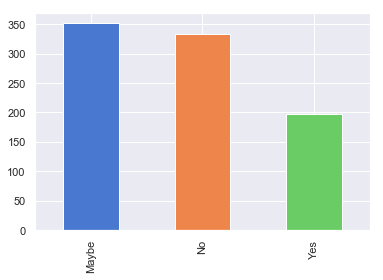

In [22]:
print(RWN["mental_health_consequence"].value_counts(normalize=True) * 100)
print("")
RWN['mental_health_consequence'].value_counts().plot(kind='bar')

### XII. Do you think that discussing a physical health issue with your employer would have negative consequences?

No       74.178935
Maybe    21.177803
Yes       4.643262
Name: phys_health_consequence, dtype: float64



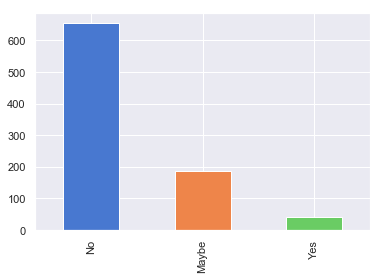

In [23]:
print(RWN["phys_health_consequence"].value_counts(normalize=True) * 100)
print("")
RWN['phys_health_consequence'].value_counts().plot(kind='bar')

### XIII. Would you be willing to discuss a mental health issue with your coworkers?

Some of them    61.947905
No              22.083805
Yes             15.968290
Name: coworkers, dtype: float64



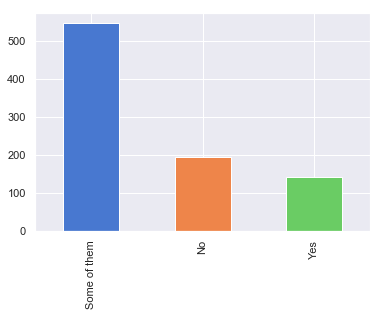

In [24]:
print(RWN["coworkers"].value_counts(normalize=True) * 100)
print("")
RWN["coworkers"].value_counts().plot(kind='bar')

### XIV. Would you be willing to discuss a mental health issue with your direct supervisor(s)?

Yes             39.637599
No              31.257078
Some of them    29.105323
Name: supervisor, dtype: float64



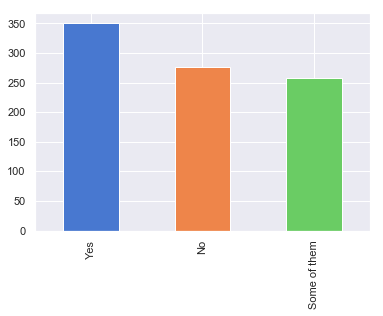

In [25]:
print(RWN["supervisor"].value_counts(normalize=True) * 100)
print("")
RWN["supervisor"].value_counts().plot(kind='bar')

### XV. Would you bring up a mental health issue with a potential employer in an interview?

No       82.219706
Maybe    14.949037
Yes       2.831257
Name: mental_health_interview, dtype: float64



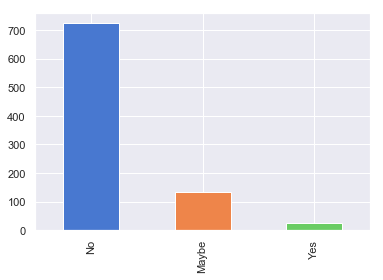

In [26]:
print(RWN["mental_health_interview"].value_counts(normalize=True) * 100)
print("")
RWN["mental_health_interview"].value_counts().plot(kind='bar')

### XVI. Would you bring up a physical health issue with a potential employer in an interview?

Maybe    43.261608
No       40.996602
Yes      15.741789
Name: phys_health_interview, dtype: float64



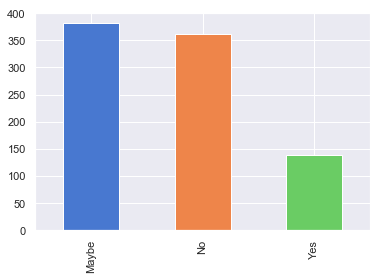

In [27]:
print(RWN["phys_health_interview"].value_counts(normalize=True) * 100)
print("")
RWN["phys_health_interview"].value_counts().plot(kind='bar')

### XVII. Do you feel that your employer takes mental health as seriously as physical health?

Don't know    45.753114
No            28.992072
Yes           25.254813
Name: mental_vs_physical, dtype: float64



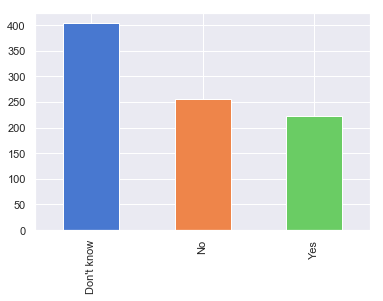

In [28]:
print(RWN["mental_vs_physical"].value_counts(normalize=True) * 100)
print("")
RWN["mental_vs_physical"].value_counts().plot(kind='bar')

### XVIII. Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

No     84.484711
Yes    15.515289
Name: obs_consequence, dtype: float64



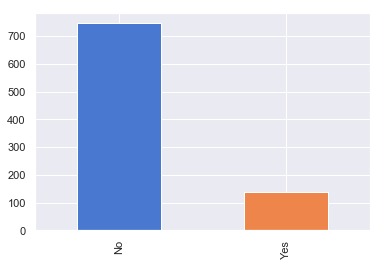

In [29]:
print(RWN["obs_consequence"].value_counts(normalize=True) * 100)
print("")
RWN["obs_consequence"].value_counts().plot(kind='bar')